In [1]:
try:
    import cPickle as pickle
except ModuleNotFoundError:
    import pickle
    
from smr import File
import numpy as np
from matplotlib import pyplot as plt
from kaveh.behavioral import oculomotor
from kaveh import plots

In [2]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [3]:
# f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B091208/B091208_1545_List.smr'
f_name = '/mnt/papers/Herzfeld_Nat_Neurosci_2018/raw_data/2010_Adapt/Buckley_12deg/B091908_2/B091908_21602_Adapt.smr'
smr_content = File(f_name)
smr_content.read_channels()

Not implemented (type = 6)
Not implemented (type = 6)
Not implemented (type = 5)
Not implemented (type = 5)


In [233]:
chan_titles = [chan.title for chan in smr_content.channels]
for i, ct in enumerate(chan_titles):
    print("{}: {}".format(i, ct))

0: Unit
1: HE
2: VE
3: HT
4: VT
5: H2 Targ
6: V2 Targ
7: Aux 1
8: Aux 2
9: Saved Eve
10: Saccade O
11: Saccade E
12: Burst Ons
13: Burst End
14: Target Ti
15: Spike
16: Spike Den
17: Accept Sp
18: Raster
19: Keyboard
20: Events


In [246]:
smr_content.get_channel(7).data.max()

2

<IPython.core.display.Javascript object>


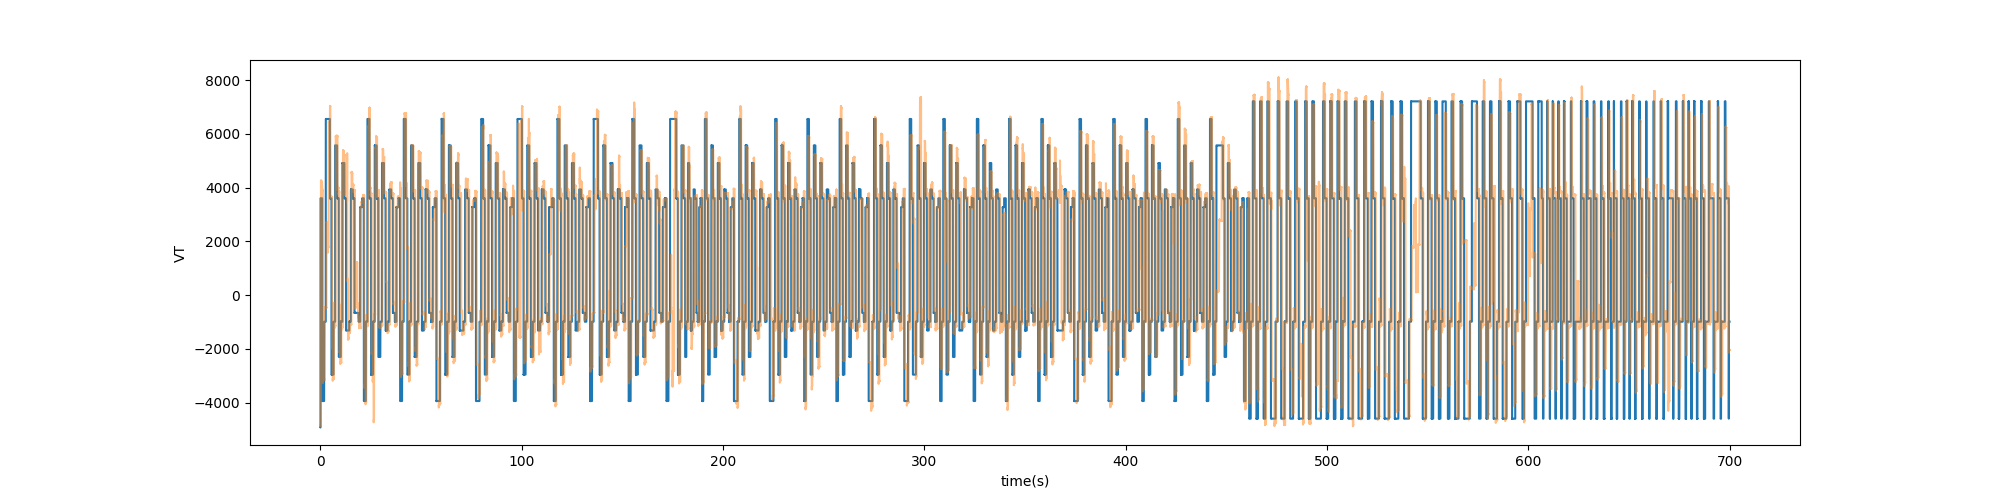

<IPython.core.display.Javascript object>


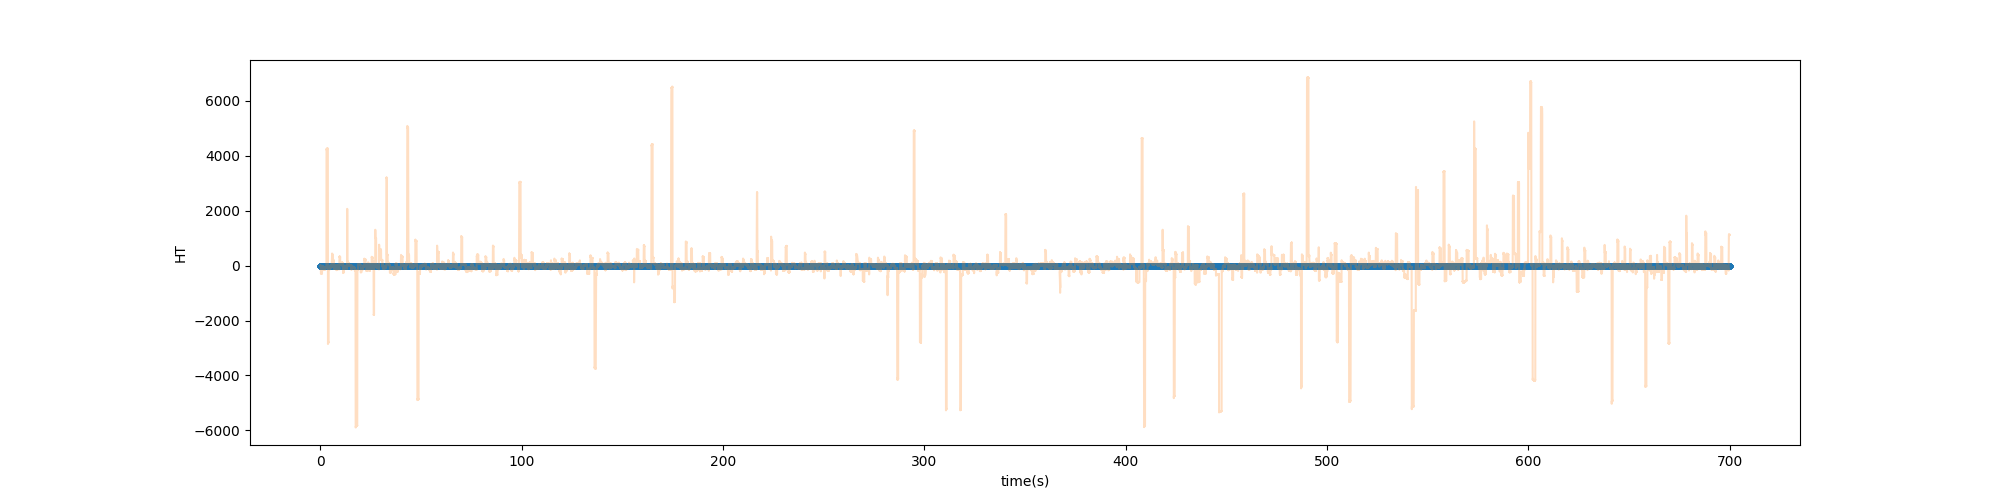

Text(0.5,0,u'time(s)')

In [230]:
vt = smr_content.get_channel(4)
ve = smr_content.get_channel(2)

ht = smr_content.get_channel(3)
he = smr_content.get_channel(1)

t_range = (0,700) #s
fsize =  (20,5)
i_range = [int(x/vt.dt) for x in t_range]
prange = slice(i_range[0], i_range[1])

plt.figure(figsize = fsize)
# plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, vt.data[prange]/float(2*vt.divide))
# plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, ve.data[prange]/float(2*ve.divide), alpha=0.5)
plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, vt.data[prange])
plt.plot(np.arange(0, vt.data[prange].size)*vt.dt, ve.data[prange], alpha=0.5)
plt.ylabel(vt.title)
plt.xlabel('time(s)')

plt.figure(figsize = fsize)
# plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, ht.data[prange]/float(2*ht.divide),'.-')
# plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, he.data[prange]/float(2*ht.divide), alpha=0.25)

plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, ht.data[prange],'.-')
plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, he.data[prange], alpha=0.25)

plt.ylabel(ht.title)
plt.xlabel('time(s)')


In [ ]:
from kaveh.behavioral import oculomotor

tt = oculomotor.target(vt.data[prange], ht.data[prange], ht.dt, '2d')
target_jumps_to = tt.get_target_jumps(num_clusters=24, jump_tol= 100)

plt.figure(figsize = fsize)
# plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, ht.data[prange]/float(2*ht.divide),'.-')
# plt.plot(np.arange(0, ht.data[prange].size)*ht.dt, he.data[prange]/float(2*ht.divide), alpha=0.25)

plt.plot(np.arange(0, tt.vt.size)*tt.dt, tt.vt, 'r', alpha = 0.3)
plt.plot(np.arange(0, tt.ht.size)*tt.dt, tt.ht, '.-')

# plt.plot(tt.vt, 'g', alpha = 0.3)
# plt.plot(tt.ht, '.-')

# plt.ylabel(ht.title)
plt.xlabel('time(s)')


jump_amps = target_jumps_to.keys()
colors = plt.cm.jet(np.linspace(0, 1, len(jump_amps)))
for i, ja in enumerate(jump_amps):
    plots.axvlines(plt.gca(), target_jumps_to[ja]*tt.dt, alpha = 0.25, color=colors[i])        

legend_labels = [vt.title , ht.title] + [str(ja) for ja in jump_amps]
plt.legend(legend_labels)


In [217]:
np.linalg.norm((1200, 1200))

1697.0562748477141

In [226]:
pos_diff_v = np.abs(np.diff(vt.data[prange]))
target_jump_indices_v = scipy.signal.find_peaks(pos_diff_v, prominence=200)[0]


# remove detected target jumps that are sequential (less than 5 samples apart)
to_delete = []
for i, tji in enumerate(target_jump_indices_v[1:]):
    if tji - target_jump_indices_v[i] < 5:
        to_delete = to_delete + [i+1]
        print(i)
mask = np.ones(target_jump_indices_v.shape, dtype=bool)
mask[to_delete] = False
target_jump_indices_v = target_jump_indices_v[mask]


pos_diff_h = np.abs(np.diff(ht.data[prange]))
target_jump_indices_h = scipy.signal.find_peaks(pos_diff_h, prominence=200)[0]


# remove detected target jumps that are sequential (less than 5 samples apart)
to_delete = []
for i, tji in enumerate(target_jump_indices_h[1:]):
    if tji - target_jump_indices_h[i] < 5:
        to_delete = to_delete + [i+1]
        print(i)
mask = np.ones(target_jump_indices_h.shape, dtype=bool)
mask[to_delete] = False
target_jump_indices_h = target_jump_indices_h[mask]


target_jump_indices = np.union1d(target_jump_indices_v, target_jump_indices_h)

30
70
78
154
79
154


<IPython.core.display.Javascript object>


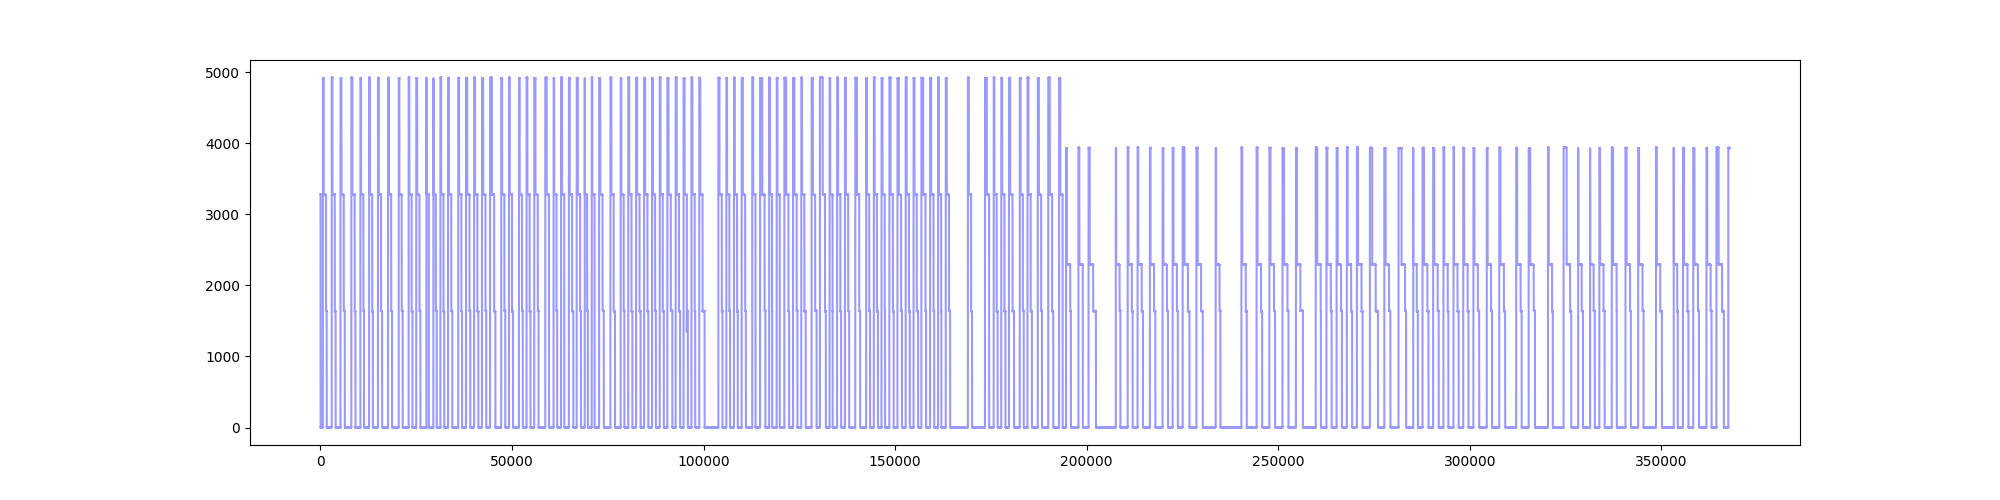

In [229]:
pos_2d = np.column_stack((vt.data[prange], ht.data[prange]))
pos_norm = np.linalg.norm(pos_2d,  axis = -1)
# pos_norm1 = np.sum(pos_2d,  axis = -1)
plt.figure(figsize=fsize)
plt.plot(pos_norm, 'b', alpha=0.4)


In [ ]:
import scipy.signal
# plt.figure()
# plt.plot(ht.data[prange],'.-')

# find target jumps
pos_diff = np.abs(np.diff(pos_norm))
target_jump_indices = scipy.signal.find_peaks(pos_diff, prominence=200)[0]

# remove detected target jumps that are sequential (less than 5 samples apart)
to_delete = []
for i, tji in enumerate(target_jump_indices[1:]):
    if tji - target_jump_indices[i] < 5:
        to_delete = to_delete + [i+1]
        print(i)
mask = np.ones(target_jump_indices.shape, dtype=bool)
mask[to_delete] = False
target_jump_indices = target_jump_indices[mask]

In [227]:
from kaveh.plots import axvlines
axvlines(plt.gca(), target_jump_indices, color='r', alpha=0.3 )

In [192]:
jump_vecs_h = []
for tji in target_jump_indices:
    jump_vecs_h = jump_vecs_h + [ht.data[prange][tji + 5] - ht.data[prange][tji - 5]]
jump_vecs_h = np.array(jump_vecs_h)    
    
jump_vecs_v = []
for tji in target_jump_indices:
    jump_vecs_v = jump_vecs_v + [vt.data[prange][tji + 5] - vt.data[prange][tji - 5]]
jump_vecs_v = np.array(jump_vecs_v)

<IPython.core.display.Javascript object>


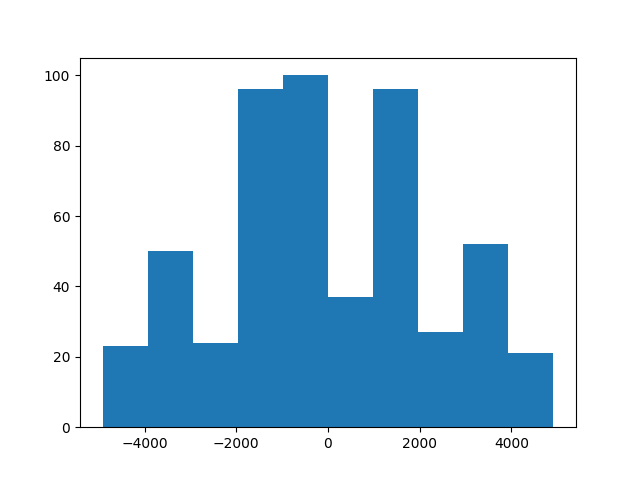

(array([ 23.,  50.,  24.,  96., 100.,  37.,  96.,  27.,  52.,  21.]),
 array([-4.9180e+03, -3.9343e+03, -2.9506e+03, -1.9669e+03, -9.8320e+02,
         5.0000e-01,  9.8420e+02,  1.9679e+03,  2.9516e+03,  3.9353e+03,
         4.9190e+03]),
 <a list of 10 Patch objects>)

In [193]:
plt.figure()
plt.hist(jump_vecs_h)

In [194]:
jump_vecs = np.column_stack((jump_vecs_h, jump_vecs_v))


In [201]:
from sklearn.cluster import KMeans
#jump_vecs = np.array(jump_vecs).reshape(-1,1)
kmeans = KMeans(n_clusters=24, random_state=0).fit(jump_vecs)
jump_amps = kmeans.cluster_centers_
#jump_amps = np.array([int(ja) for ja in jump_amps])

In [202]:
jump_amps = np.int64(jump_amps)
print(jump_amps)


[[    0  1657]
 [    0 -1639]
 [ 3845     0]
 [-4915     0]
 [-2742 -2742]
 [-2780  2780]
 [ 2745  2745]
 [ 3476 -3476]
 [    0 -4916]
 [    0  4916]
 [ 1639     0]
 [-1639     0]
 [ 1158  1158]
 [ 1158 -1158]
 [-1158  1158]
 [-1172 -1172]
 [ 4916     0]
 [ 3476  3476]
 [-3476  3476]
 [-3476 -3477]
 [    0  3839]
 [ 2746 -2747]
 [-3932     0]
 [    0 -3933]]


In [203]:
jump_vecs[np.where(kmeans.labels_ == 1),:]


array([[[    0, -1639],
        [    0, -1639],
        [    0, -1641],
        [    0, -1641],
        [   -3, -1641],
        [   -1, -1639],
        [    0, -1641],
        [    2, -1640],
        [   -1, -1639],
        [    1, -1640],
        [    0, -1639],
        [    0, -1637],
        [   -1, -1639],
        [    1, -1639],
        [   -1, -1639],
        [   -1, -1639],
        [    1, -1640],
        [    1, -1638],
        [   -1, -1639],
        [   -1, -1638],
        [    2, -1639],
        [   -2, -1641],
        [    0, -1640],
        [    1, -1641],
        [   -1, -1640],
        [    0, -1642],
        [    0, -1639],
        [   -2, -1640],
        [    0, -1639],
        [   -1, -1639],
        [    1, -1639],
        [    2, -1639]]], dtype=int16)

In [204]:
target_jumps_to = {}
jump_tol = 200

for ja in jump_amps:
    target_jumps_to[str(ja)] = np.array([], dtype='int64')
for i, tji in enumerate(target_jump_indices):
    for ja in jump_amps:
        if (jump_vecs[i,0] < ja[0] + jump_tol and
            jump_vecs[i,0] >= ja[0] - jump_tol and
            jump_vecs[i,1] < ja[1] + jump_tol and
            jump_vecs[i,1] >= ja[1] - jump_tol):
            target_jumps_to[str(ja)] = np.concatenate((target_jumps_to[str(ja)], [tji]))
            
            
        
    


In [205]:
print(jump_vecs[1])

[4916    0]


<IPython.core.display.Javascript object>


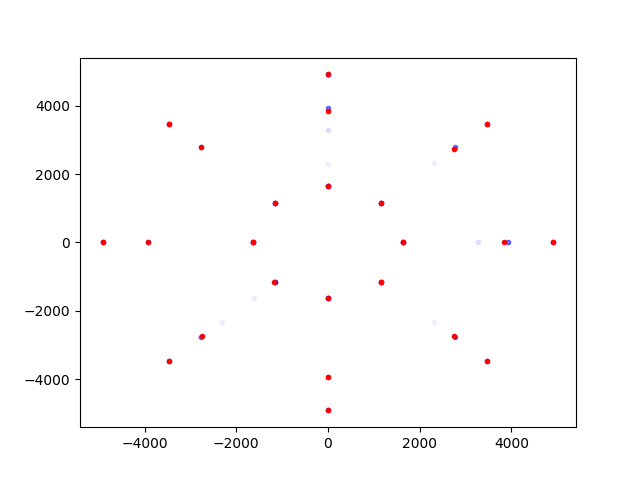

In [206]:
# plt.figure()
# plt.plot(jump_vecs_h/(ht.l_chan_dvd*ht.scale/10.0), jump_vecs_v/(vt.l_chan_dvd*vt.scale/10.0), '.b', alpha = 0.05)
# plt.plot(jump_amps[:,0]/(ht.l_chan_dvd*ht.scale/10.0), jump_amps[:,1]/(vt.l_chan_dvd*vt.scale/10.0), '.r', alpha=1)

plt.figure()
plt.plot(jump_vecs_h, jump_vecs_v, '.b', alpha = 0.05)
plt.plot(jump_amps[:,0], jump_amps[:,1], '.r', alpha=1)

In [210]:
for ja in jump_amps:
    print(ja, target_jumps_to[str(ja)].size)

(array([   0, 1657]), 35)
(array([    0, -1639]), 32)
(array([3845,    0]), 13)
(array([-4915,     0]), 22)
(array([-2742, -2742]), 11)
(array([-2780,  2780]), 12)
(array([2745, 2745]), 12)
(array([ 3476, -3476]), 17)
(array([    0, -4916]), 22)
(array([   0, 4916]), 20)
(array([1639,    0]), 35)
(array([-1639,     0]), 34)
(array([1158, 1158]), 31)
(array([ 1158, -1158]), 30)
(array([-1158,  1158]), 29)
(array([-1172, -1172]), 32)
(array([4916,    0]), 21)
(array([3476, 3476]), 20)
(array([-3476,  3476]), 18)
(array([-3476, -3477]), 20)
(array([   0, 3839]), 12)
(array([ 2746, -2747]), 13)
(array([-3932,     0]), 13)
(array([    0, -3933]), 13)


<IPython.core.display.Javascript object>


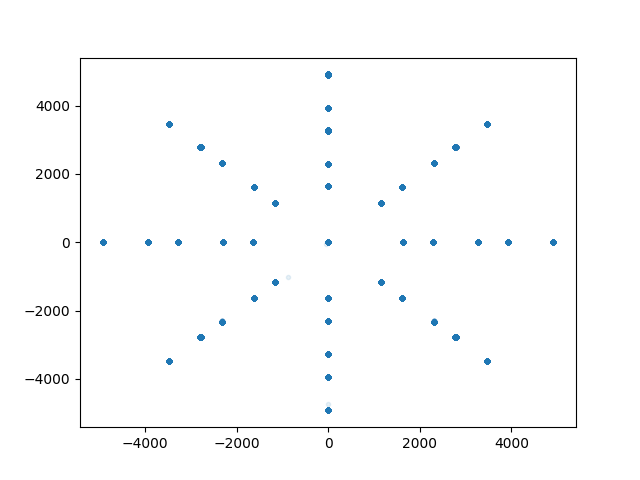

In [199]:
plt.figure()
# plt.plot(ht.data[prange]/(ht.l_chan_dvd*ht.scale/10.0), vt.data[prange]/(vt.l_chan_dvd*vt.scale/10.0), '.', alpha=0.1)
plt.plot(ht.data[prange], vt.data[prange], '.', alpha=0.1)

<IPython.core.display.Javascript object>


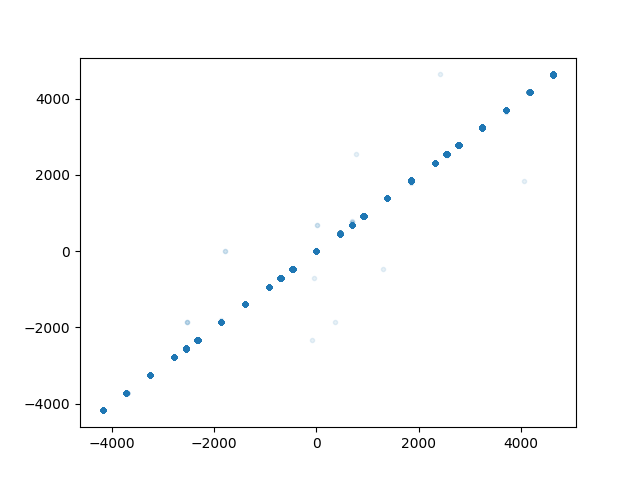

In [57]:
plt.figure()
# plt.plot(ht.data[prange]/(ht.l_chan_dvd*ht.scale/10.0), vt.data[prange]/(vt.l_chan_dvd*vt.scale/10.0), '.', alpha=0.1)
plt.plot(ht.data[prange], vt.data[prange], '.', alpha=0.1)

In [ ]:
%matplotlib inline
import time
# import pylab as pl
from IPython import display
plt.figure(figsize=(10,10))

for i in range(i_range[0], i_range[1], 10):
    plt.plot(ht.data[i],vt.data[i], 'or')
    plt.ylim((-5000,5000))
    plt.xlim((-5000,5000))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.001)
    plt.cla()
#     plt.cla()